# Class 7

- Models

- Comparing two samples

- Causality


# Models

- A model is a set of assumptions about the data.  In many cases models include assumptions about random (stochastic) processes used to generate the data.

- Data scientists are often in a position of formulating and assessing models.

## Goals of Data Science

- Deeper understanding of the world.

- Make the world a better place to live.

- For example, help expose injustice.

- The skills you are learning help empower you to do this.

## Jury Selection

- U.S. Constitution grants equal protection under the law

- All defendants have the right to due process 

- Robert Swain, a Black man, was convicted in Talladega County, AL

- He appealed to the U.S. Supreme Court

- Main reason: Unfair jury selection in the County’s trials

- At the time of the trial, only men aged 21 or more were eligible to serve on juries in Talladega County. In that population, 26% of the men were Black. 

- But only eight men among the panel of 100 men (that is, 8%) were Black.

- The U.S. Supreme Court reviewed the appeal and concluded, “the overall percentage disparity has been small.” But was this assertion reasonable? 

- If jury panelists were selected at random from the county’s eligible population, there would be some chance variation. We wouldn’t get exactly 26 Black panelists on every 100-person panel. But would we expect as few as eight?

# A model of random selection

- A model of the data is that the panel was selected at random and ended up with a small number of Black panelists just due to chance.

- Since the panel was supposed to resemble the population of all eligible jurors, the model of random selection is important to assess. Let’s see if it stands up to scrutiny.

- The `numpy.random` function `multinomial(n, pvals, size)` can be used to simulate sample proportions or counts with two or more categories.

## Example 1: rolling a six-sided die 20 times

In [1]:
import numpy as np

sample_size = 20

num_simulations = 1

true_probabilities = [1/6]*6

counts = np.random.multinomial(sample_size, true_probabilities, size = num_simulations)

counts

array([[3, 5, 4, 6, 2, 0]])

In [2]:
proportions = counts / sample_size

print('Sample counts: \n', counts) 
print('Sample proportions: \n', proportions)

Sample counts: 
 [[3 5 4 6 2 0]]
Sample proportions: 
 [[0.15 0.25 0.2  0.3  0.1  0.  ]]


## Example 2: rolling a loaded six-side 100 times more likely to land on 6 - repeated 3 times

In [3]:
sample_size = 100

num_simulations = 3

true_probabilities = [1/7]*5 + [2/7]

counts = np.random.multinomial(sample_size, true_probabilities, size = num_simulations)

proportions = counts / sample_size

print('Sample counts:\n', counts) 
print('Sample proportions: \n', proportions)

Sample counts:
 [[10 16 16 14 12 32]
 [21 16  8 17 16 22]
 [14 13 15 17 14 27]]
Sample proportions: 
 [[0.1  0.16 0.16 0.14 0.12 0.32]
 [0.21 0.16 0.08 0.17 0.16 0.22]
 [0.14 0.13 0.15 0.17 0.14 0.27]]


- Let's use this to simulate the jury selection process.

- The size of the jury panel is 100, so `sample_size` is 100. 

- The distribution from which we will draw the sample is the distribution in the population of eligible jurors: 26% of them were Black, so 100% - 26% = 74% are white (very simplistic assumption, but let's go with it for now). 

- This means `true_pobabilities` is `[0.26, 0.74]`.

- One simulation is below.

In [4]:
import numpy as np
import pandas as pd

sample_size = 100

true_probabilities = [0.26, 0.74]

num_simulations = 1

counts = np.random.multinomial(sample_size, true_probabilities, size = num_simulations)

counts

array([[26, 74]])

In [5]:
proportions = counts / sample_size

sim_counts = pd.DataFrame(proportions, columns = ['Black', 'White'])

print(sim_counts)

sim_counts.iloc[0,0]

   Black  White
0   0.26   0.74


0.26

## Simulate one value

- Let's write a function to simulate one value.

In [6]:
def simulate_one_count():
    sample_size = 100 # jury size

    true_probabilities = [0.26, 0.74] #true prob of race
    
    num_simulations = 1 # number of simulations
    # get the random counts
    counts = np.random.multinomial(sample_size, true_probabilities, size = num_simulations) 
    
    # store in data frame
    sim_counts = pd.DataFrame(counts, columns = ['Black', 'White'])
    
    return sim_counts.iloc[0,0]


In [7]:
simulate_one_count()

27

## Simulate multiple values

-  Our analysis is focused on the variability in the counts. 

- Let’s generate 10,000 simulated values of the count and see how they vary.

- We will do this by using a for loop and collecting all the simulated counts in a list called `sim_counts`

In [8]:
sim_counts = []

number_sims = 10000

for _ in np.arange(number_sims):
    sim_counts.append(simulate_one_count())

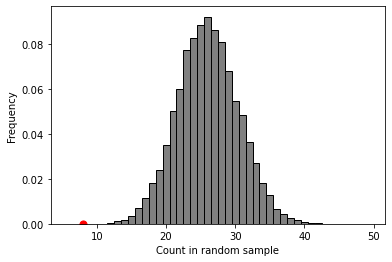

In [9]:
import matplotlib.pyplot as plt

plt.hist(sim_counts, bins = np.arange(5.5, 50, 1), edgecolor = 'black', 
         color = 'grey', density = True);
plt.xlabel('Count in random sample')
plt.ylabel('Frequency')
plt.scatter(8, 0, color = 'red', s =50);

## Conclusion of the data analysis

- The histogram shows that if we select a panel of size 100 at random from the eligible population, we are very unlikely to get counts of Black panelists that are as low as the eight that were observed on the panel in the trial.

- This is evidence that the model of random selection of the jurors in the panel is not consistent with the data from the panel. While it is possible that the panel could have been generated by chance, our simulation demonstrates that it is hugely unlikely.

- Therefore the most *reasonable* conclusion is that the assumption of random selection is unjustified for this jury panel.

- The simulation also could have been done using `np.random.multinomial`.

- This is an example of a 'vectorized' computation, and are usually faster than non-vectorized computations.

In [10]:
sample_size = 100

true_probabilities = [0.26, 0.74]

num_simulations = 10000

counts = np.random.multinomial(sample_size, true_probabilities, size = num_simulations)

print(len(counts))

counts

10000


array([[29, 71],
       [20, 80],
       [25, 75],
       ...,
       [22, 78],
       [30, 70],
       [21, 79]])

# Comparing two samples 

## Are mental health visit rates higher in Toronto Neighbourhoods with higher material deprivation?

<mark> Michael discus data and material deprivation index </mark>

>Material deprivation is closely connected to poverty and it refers to inability for individuals and communities to access and attain basic material needs. The indicators included in this dimension measure income, quality of housing, educational attainment, and family structure characteristics. 

[See 2011 Ontario Marginalization Index Documentation](https://www.publichealthontario.ca/-/media/Documents/O/2017/on-marg-technical.pdf?la=en≻lang=en&hash=EED54DF437EDEDA2DFE1A00A4B14A50A)

# Data wrangling

- The next few slides involve reading the data into pandas and getting it readu for analysis.
- This won't be covered in detail in class, but we have already covered this process in previous classes.

- The data is stored in `1_marg_neighb_toronto_2006_OnMarg.xls` - a Microsoft Excel file format with file extension `.xls`.

- Use `pandas` function `read_excel` with `sheet_name` parameter.

### Neighbourhood deprivation scores

In [14]:
# this python library is not pre-installed
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [15]:
marg_neighb = pd.read_excel('1_marg_neighb_toronto_2006_OnMarg.xls', 
                            sheet_name='Neighbourhood_Toronto_OnMarg')

In [16]:
marg_neighb.head()

,Unnamed: 0,"Ontario Marginalization Index. Toronto Neighbourhoods 2006, \nQuintiles: Material Deprivation, Residential Instability, Dependency, Ethnic Concentration",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Neighb id,Neighbourhood name,POPULATION,INSTABILITY,INSTABILITY_Q,DEPRIVATION,DEPRIVATION_Q,ETHNICCONCENTRATION,ETHNICCONCENTRATION_Q,DEPENDENCY,DEPENDENCY_Q,ONMARG_COMBINED_Q
1,1,West Humber-Clairville,32252,-0.6639,1,0.162,3,2.4548,5,-0.2021,3,2.4
2,2,Mount Olive-Silverstone-Jamestown,32127,-0.1081,1,1.0195,5,3.7433,5,-0.5975,1,2.4
3,3,Thistletown-Beaumond Heights,9928,-0.3131,1,0.346,4,1.622,4,0.2845,5,2.8
4,4,Rexdale-Kipling,10725,0.1866,2,0.4704,4,1.2396,3,0.2734,5,2.8


If we specify `header` parameter then it will include column names.

In [13]:
marg_neighb = pd.read_excel('1_marg_neighb_toronto_2006_OnMarg.xls', 
                            sheet_name='Neighbourhood_Toronto_OnMarg', 
                            header=1)

In [ ]:
marg_neighb.head()

Get the column names of `marg_neighb`.

In [ ]:
marg_neighb.columns

Select the columns corresponding to neighbourhood id (column 0), neighbourhood name (column 1), and deprivation score (column 5).

In [ ]:
marg_neighb[marg_neighb.columns[[0, 1, 5]]]

Create a new `DataFrame` called `depriv` with only those columns.

In [ ]:
depriv = marg_neighb[marg_neighb.columns[[0, 1, 5]]]

In [ ]:
colnames = {'Neighb id ': 'Neighbid',
           'DEPRIVATION' : 'DEPRIVATION',
           'Neighbourhood name ': 'name'}

depriv = depriv.copy()

depriv.rename(columns = colnames, inplace= True)

In [ ]:
depriv

### Mental health visit rates

- Read in data on rates of mental health visits stored in `2_ahd_neighb_db_ast_hbp_mhv_copd_2012.xls`.

- Use `read_excel` with `sheet_name` parameter

In [ ]:
mentalhealth_neighb = pd.read_excel('2_ahd_neighb_db_ast_hbp_mhv_copd_2012.xls', 
                                    sheet_name = '2_MentalHealthV_2012', 
                                    header = 11)
mentalhealth_neighb.head()

In [ ]:
mentalhealth_neighb.columns

In [ ]:
mhvisitrates = mentalhealth_neighb[mentalhealth_neighb.columns[[0, 1, 10]]]
mhvisitrates

In [ ]:
colnames = {'Unnamed: 0': 'Neighbid',
           'Both sexes.2' : 'mhvisitrates_mf',
           'Unnamed: 1' : 'name'}

mhvisitrates = mhvisitrates.copy()

mhvisitrates.rename(columns = colnames, inplace=True)

In [ ]:
mhvisitrates

## Merging mental health visits and depravity score

merge `mhvisitrates` and `depriv`

In [ ]:
mhvisitdepriv = mhvisitrates.merge(depriv, on = ['Neighbid', 'name'])
mhvisitdepriv

- We will create a variable that categorizes neighbourhoods above and below the median deprivation score.

In [ ]:
median_depriv = mhvisitdepriv['DEPRIVATION'].median()
median_depriv

In [ ]:
mhvisitdepriv = mhvisitdepriv.copy()

mhvisitdepriv.loc[mhvisitdepriv['DEPRIVATION'] >= median_depriv, 'depriv_HL'] = 'High'

mhvisitdepriv.loc[mhvisitdepriv['DEPRIVATION'] < median_depriv, 'depriv_HL'] = 'Low'

mhvisitdepriv

## Do Neighbourhoods with high depravity have more mental health visits compared to Neighbourhoods with low depravity?

- The mean rate of mental health visits in the high poverty neighbourhoods is 8.80 and the mean rate in the low poverty neighbourhoods is 7.48.

In [ ]:
mean_table = mhvisitdepriv.groupby('depriv_HL')['mhvisitrates_mf'].mean()
mean_table

In [ ]:
observed_mean_difference = mean_table.iloc[0] - mean_table.iloc[1]
observed_mean_difference

- Let's compare the distribution of mental health visit rates by high/low deprivation.

## The Logic of Hypothesis Testing

### 1. Hypotheses

Two claims:

1. There is no difference in the mean mental health visit rates between high and low depravity neighbourhoods.  This is called the null hypothesis.

2. There is a difference in the mean mental health visit rates between high and low depravity neighbourhoods.  This is called the alternative hypothesis.

### 2. Test statistic

The test statistic is a number, calculated from the data, that captures what we're interested in.

What would be a useful test statistic for this study?

### 3. Simulate what the null hypothesis predicts will happen

- If the null hypothesis is true then the mean values of high and low depravity neighbourhoods will be the same regardless of how they are labelled.  That means we can randomly shuffle the labels and the mean difference should be close to 0.

- Imagine we have 68 playing cards labelled `High` and 68 cards labelled `Low`.

- Shuffle the cards ...

- Assign the cards to the 136 neighbourhoods then calculate the mean difference between high and low.  This is one simulated value of the test statistic. 

- Shuffle the cards again ...

- Assign the cards to the 136 neighbourhoods then calculate the mean difference between high and low.  This is another simulated value of the test statistic. 

- Continue shuffling, assigning to neigbourhoods, and computing the mean difference.

## Shuffling

- The difference in mean rate of mental health visits between high and low deprivation is 0.75.

- Could this difference be due to chance?

- Let's repeat this study **assuming that the difference is due to chance**.

- Suppose that the (true) mean mental health visit rates in high deprivation neigbourhoods is equal to the (true) mean mental health visit rates in low deprivation neigbourhoods. Then the **labels** of `'depriv_HL'` `High` and `Low` are ...

## Quiz

If the (true) mean mental health visit rates in high deprivation neigbourhoods is equal to the (true) mean mental health visit rates in low deprivation neigbourhoods. Then the **labels** of `'depriv_HL'` `High` and `Low` on neighbourhoods are ...

A. interchangable (`High` can be changed for `Low` without effecting the mean mental health visit rates)

B. not interchangable 

C. random

D. the same, but different on average.

E. different, but the same on average. 

So, if 

(1) (The true) mean mental health visit rates in high deprivation neigbourhoods are equal to the (true) mean mental health visit rates in low deprivation neigbourhoods.

(2) the **labels** `High` and `Low` are randomly shuffled. 

(3) the mean mental health rates for `High` and `Low` depravity are re-calculated using the shuffled labels.

In [ ]:
mhvisitdepriv.iloc[0:10,[2,4]]

## Random shuffling

- We can randlomly shuffle using the `sample` function in `pandas`.
- The parameter `frac` in the `pandas` `sample` function refers to the fraction of rows to return.  `frac = 1` means all the rows are returned.

In [ ]:
mhvisitdepriv.iloc[0:10,4].sample(frac = 1, replace = False)

- `reset_index` resets the index.  
- the parameter `drop = True` in `reset_index` indicates not to save the index as a column.

In [ ]:
mhvisitdepriv.iloc[0:10,4].sample(frac = 1, replace = False).reset_index(drop = True)

We can investigate what happens if the labels for `High` and `Low` are randomly shuffled for the first 10 rows. 

In [ ]:
# mental health visit rates for first 10 rows

visits = mhvisitdepriv.loc[0:10, 'mhvisitrates_mf']

# randomly shuffle deprav_HL 
# previous index is dropped because we don't need it

shuffled_depriv = mhvisitdepriv.loc[0:10, 'depriv_HL'].sample(frac = 1, replace = False).reset_index(drop = True)

# put two dataframes in a list as input to
# pd.concat

L = [visits, shuffled_depriv]

# combine two columns
pd.concat(L, axis = 1)


## Set up the simulation in python

**Step 1:** Shuffle the column `'depriv_HL'`

- To do this we will use `pandas` `sample` with the following parameters for the sample function:

  + `frac = 1` (sample 100% of values)
  + `replace = True` (we want the same numbre of `High` `Low` as originbal sample)
  
- `reset_index(drop = True)` (use the dafault index - row labels in `pandas` so that we can assign shuffled labels to )

In [ ]:
depriv_HL_shuffle = mhvisitdepriv['depriv_HL'].sample(frac = 1, replace=False).reset_index(drop = True)

**Step 2:** Assign the shuffled labels to the neighbourhoods and compute the mean rate of mental health visits

In [ ]:
visitrate_low_shuffle = mhvisitdepriv.loc[depriv_HL_shuffle == 'High', 'mhvisitrates_mf'].mean()

visitrate_high_shuffle  = mhvisitdepriv.loc[depriv_HL_shuffle == 'Low', 'mhvisitrates_mf'].mean()

**Step 3:** Compute the mean difference between the groups

In [ ]:
visitrate_high_shuffle - visitrate_low_shuffle 

Let's create a function to do Steps 1 - 3 that returns the mean difference (a simulated value of the test statistic).

In [ ]:
def random_shuffle_mean():
    # step 1
    depriv_HL_shuffle = mhvisitdepriv['depriv_HL'].sample(frac = 1, replace=False).reset_index(drop = True)
    
    #step 2
    visitrate_low_shuffle = mhvisitdepriv.loc[depriv_HL_shuffle == 'High', 'mhvisitrates_mf'].mean()
    visitrate_high_shuffle  = mhvisitdepriv.loc[depriv_HL_shuffle == 'Low', 'mhvisitrates_mf'].mean()
    
    #step 3
    shuffled_diff = visitrate_high_shuffle - visitrate_low_shuffle 
    
    return shuffled_diff    

In [ ]:
random_shuffle_mean()

## Distribution of simulated values of the mean difference assuming the null hypothesis is true

- Statistical tests based on shuffles or permutations of the data are called permutation tests. 

In [ ]:
shuffled_diffs = []

for _ in range(5000):
    shuffled_diffs.append(random_shuffle_mean())

In [ ]:
import matplotlib.pyplot as plt

plt.hist(shuffled_diffs, color = 'grey', edgecolor = 'black')

plt.vlines(x = observed_mean_difference, ymin = 0, ymax = 1600, color = 'red')

plt.vlines(x = -1*observed_mean_difference, ymin = 0, ymax = 1600, color = 'red')

# p-value

- Assuming that the null hypothesis is true, the P-value gives a measure of the probability of getting data that are *at least* as unusual or extreme as the sample data.

- What does "at least as unusual" mean?

- An unusual value would be a mean difference (`High` minus `Low`) greater than what we observed or a mean difference (`Low` minus `High`) less than what we observed.

- Values that are larger than the observed value mean difference (the test statistic) 0.75 (`High` minus `Low`) or smaller than - 0.75 (`Low` minus `High`).

The number of simulated mean differences that are greater than the observed mean difference can be computed using:

In [ ]:
rightextreme = shuffled_diffs >= observed_mean_difference

rightextreme.sum()

The number of simulated mean differences that are less than the -1 times observed mean difference can be computed using:

In [ ]:
leftextreme = shuffled_diffs <= -1*observed_mean_difference

leftextreme.sum()

The proportion of simulations that are unusual or extreme are:

In [ ]:
(rightextreme.sum() + leftextreme.sum()) / 5000

We can also write a function to carry out this computation.

In [ ]:
def pvalue2(shuff_diffs, obs_diffs):
    rightextreme_count = (shuff_diffs >= obs_diffs).sum()
    leftextreme_count = (shuff_diffs < -1*obs_diffs).sum()
    allextreme = rightextreme_count + leftextreme_count
    pval = allextreme / len(shuff_diffs)
    return pval  

In [ ]:
pvalue2(shuff_diffs = shuffled_diffs, obs_diffs = observed_mean_difference)

- This is called the **P-value**.  

- None of the permuted 5000 samples resulted in a mean difference more extreme than what we observed.

## Conclusions

So, there are two possibilities:

1. The null hypothesis of no difference is true, but we have observed a very rare value of the mean difference in our study.

2. The null hypothesis is false, and there is a difference between high and low depravity.

Many people assume that a small p-value is evidence in favour of 2 (i.e., the null hypothesis is false, and there is evidence of a difference in the means).

# Causality

Imagine the following hypothetical scenario:

- you have a headache 

- you take an Aspirin at 11:00 to relieve your pain. your pain goes away after 30 minutes.

Now, you go back in time to 11:00 ...

- you don't take an Aspirin at 11:00 to relieve your pain. your pain goes away after 48 minutes.

The **causal effect** of taking an Aspirin is 18 minutes (48 minutes - 30 minutes).


## Potential outcomes and randomized control trials

- Establishing causality involves comparing these **potential outcomes**.  

- The problem is that we can never observe both taking an Aspirin and not taking as Aspirin (in the same person at the same time under the same conditions).

- A close approximation to comparing potential outcomes is to compare two groups of people that are similar on average (age, sex, income, etc.) except one group is allowed to take Aspirin after a headache and the other group takes a fake Aspirin (sugar pill/placebo) after a headache.  This is an example of a randomized control trial.

- Then the mean difference between time to pain relief should be due to Aspirin and not other factors related to why people may or may not take an Aspirin.  



## Does Depravity Cause increases in mental health visits?

- Neighbourhoods can't be randomly assigned to high or low depravity, like people could be randomized to take a real or fake Aspirin.

- There could be many other factors related to why a neighbourhood has a low or high depravity score.  

- This mean that when we are comparing neighbourhoods with low depravity to high depravity the differences in a certain outcome such as mental health visit rates could be due to factors other than depravity such as genetic or environmental factors that are associated with mental illness, but happen to be more or less prevalent in one of the depravity groups.



## Just in case you have seen a two-sample t-test ...

This is similar to a two-sample t-test (we won't cover in this course except here) except not as flexible.  

In [ ]:
from scipy import stats

mhvisits_low = mhvisitdepriv.loc[mhvisitdepriv['depriv_HL'] == 'Low', 'mhvisitrates_mf']

mhvisits_high = mhvisitdepriv.loc[mhvisitdepriv['depriv_HL'] == 'High', 'mhvisitrates_mf']

statistic, pvalue = stats.ttest_ind(mhvisits_high, mhvisits_low)
pvalue